In [ ]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [1]:
from IPython.display import HTML, Javascript, display
from ipywidgets import widgets

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle();"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%%capture
cd ..

In [3]:
%load_ext autoreload
%autoreload 2

import dill
import matplotlib.pyplot as plt

from dreamcoder.domains.list.handwrittenProperties import handWrittenProperties, getHandwrittenPropertiesFromTemplates
from dreamcoder.domains.list.makeListTasks import joshTasks
from dreamcoder.domains.list.propSim import getPropertySimTasksMatrix, getPriorDistributionsOfProperties, createSimilarTasksDf


# Load relevant tasks, properties and helmholtz frontiers
tasks = joshTasks("final")
properties = getHandwrittenPropertiesFromTemplates(tasks, filterEquivalent=False)
fileName = "data/prop_sig/helmholtz_frontiers/josh_rich_enumerated_1/enumerated_0_10000.pkl"
helmholtzFrontiers = dill.load(open(fileName, "rb"))[:100]
valuesToInt = {"allFalse":0, "allTrue":1, "mixed":2}

# Compute prior probabilities (over tasks) for property values
taskPropertyMatrix = getPropertySimTasksMatrix(tasks, properties, valuesToInt)
helmholtzTasksPropertyMatrix = getPropertySimTasksMatrix([f.task for f in helmholtzFrontiers], properties, valuesToInt)
propertyToPriorDistribution = getPriorDistributionsOfProperties(properties, taskPropertyMatrix, valuesToInt)

In [4]:
taskDropdown = widgets.Dropdown(
    options=[t.name for t in tasks],
    value=tasks[0].name,
    description='Task:',
    disabled=False,
)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
taskDropdown.observe(run_all, names="value")

display(taskDropdown)

Dropdown(description='Task:', options=('001_1', '002_1', '003_1', '004_1', '005_1', '006_1', '007_1', '008_1',…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

003_1 : list(int) -> list(int)
f([38, 51, 18, 72, 13]) = [5]
f([]) = [0]
f([83]) = [1]
f([73, 91, 96, 60, 61, 42, 2, 6, 33]) = [9]
f([90, 93, 81, 3, 57, 69, 21]) = [7]
f([33, 59, 44, 48]) = [4]
f([80, 54, 14, 74, 14, 74]) = [6]
f([9, 2, 27, 28, 41, 40, 31, 52]) = [8]
f([64, 39]) = [2]
f([63, 36, 7, 24, 4, 35, 0, 45, 47, 43]) = [10]
f([97, 88, 65]) = [3]


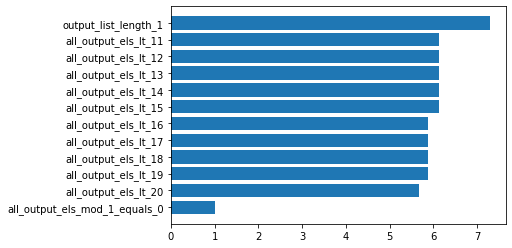

In [18]:
def getTaskIdx(taskName, tasks):
    taskIdx = [i for i,t in enumerate(tasks) if t.name == taskName]
    assert len(taskIdx) == 1
    return taskIdx[0]

taskIdx = getTaskIdx(taskDropdown.value, tasks)

_, _, sortedPropAndScores = createSimilarTasksDf(
    tasks,
    taskIdx,
    helmholtzFrontiers, 
    properties,
    helmholtzTasksPropertyMatrix, 
    propertyToPriorDistribution, 
    valuesToInt=valuesToInt,
    onlyUseTrueProperties=True,
    filterSimilarProperties=False, 
    maxFractionSame=None, 
    recomputeTasksWithTaskSpecificInputs=False, 
    computePriorFromTasks=True,
    verbose=False)

print(tasks[taskIdx].describe())

fig, ax = plt.subplots()
ax.barh([el[0].name for el in sortedPropAndScores], [1.0 / el[1] for el in sortedPropAndScores])
ax.invert_yaxis()
plt.show()